<a href="https://colab.research.google.com/github/liliayata/liliayata/blob/main/HouseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error



#Importing Data


In [ ]:
import csv
house_f = pd.read_csv("kc_house_data.csv", delimiter=",", quoting=csv.QUOTE_NONE)
house_f

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"""7129300520""","""20141013T000000""",221900.0,3,1.00,1180,5650,"""1""",0,0,3,7,1180,0,1955,0,"""98178""",47.5112,-122.257,1340,5650
1,"""6414100192""","""20141209T000000""",538000.0,3,2.25,2570,7242,"""2""",0,0,3,7,2170,400,1951,1991,"""98125""",47.7210,-122.319,1690,7639
2,"""5631500400""","""20150225T000000""",180000.0,2,1.00,770,10000,"""1""",0,0,3,6,770,0,1933,0,"""98028""",47.7379,-122.233,2720,8062
3,"""2487200875""","""20141209T000000""",604000.0,4,3.00,1960,5000,"""1""",0,0,5,7,1050,910,1965,0,"""98136""",47.5208,-122.393,1360,5000
4,"""1954400510""","""20150218T000000""",510000.0,3,2.00,1680,8080,"""1""",0,0,3,8,1680,0,1987,0,"""98074""",47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,"""0263000018""","""20140521T000000""",360000.0,3,2.50,1530,1131,"""3""",0,0,3,8,1530,0,2009,0,"""98103""",47.6993,-122.346,1530,1509
21609,"""6600060120""","""20150223T000000""",400000.0,4,2.50,2310,5813,"""2""",0,0,3,8,2310,0,2014,0,"""98146""",47.5107,-122.362,1830,7200
21610,"""1523300141""","""20140623T000000""",402101.0,2,0.75,1020,1350,"""2""",0,0,3,7,1020,0,2009,0,"""98144""",47.5944,-122.299,1020,2007
21611,"""0291310100""","""20150116T000000""",400000.0,3,2.50,1600,2388,"""2""",0,0,3,8,1600,0,2004,0,"""98027""",47.5345,-122.069,1410,1287


In [ ]:
house_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  object 
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

#Data cleaning
##Missing values

In [ ]:
house_f.isnull().sum()  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house=house_f.drop([9007])  #we notice that there is only one missing value in each column which is located in the last line so we directly delete the line



In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#Data visualization
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


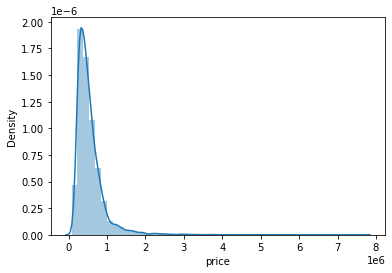

In [ ]:
sns.distplot(house.price) #check the distribution of our targuet 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


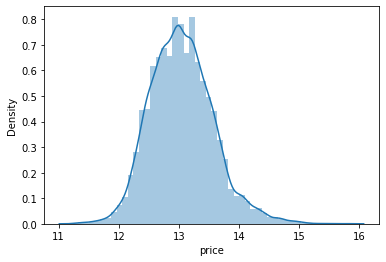

In [ ]:
sns.distplot(np.log(house.price)) #Transform the target variable to remove the skewed distribution

##Let's check the the most important features by using a correlation Matrix with Heatmap

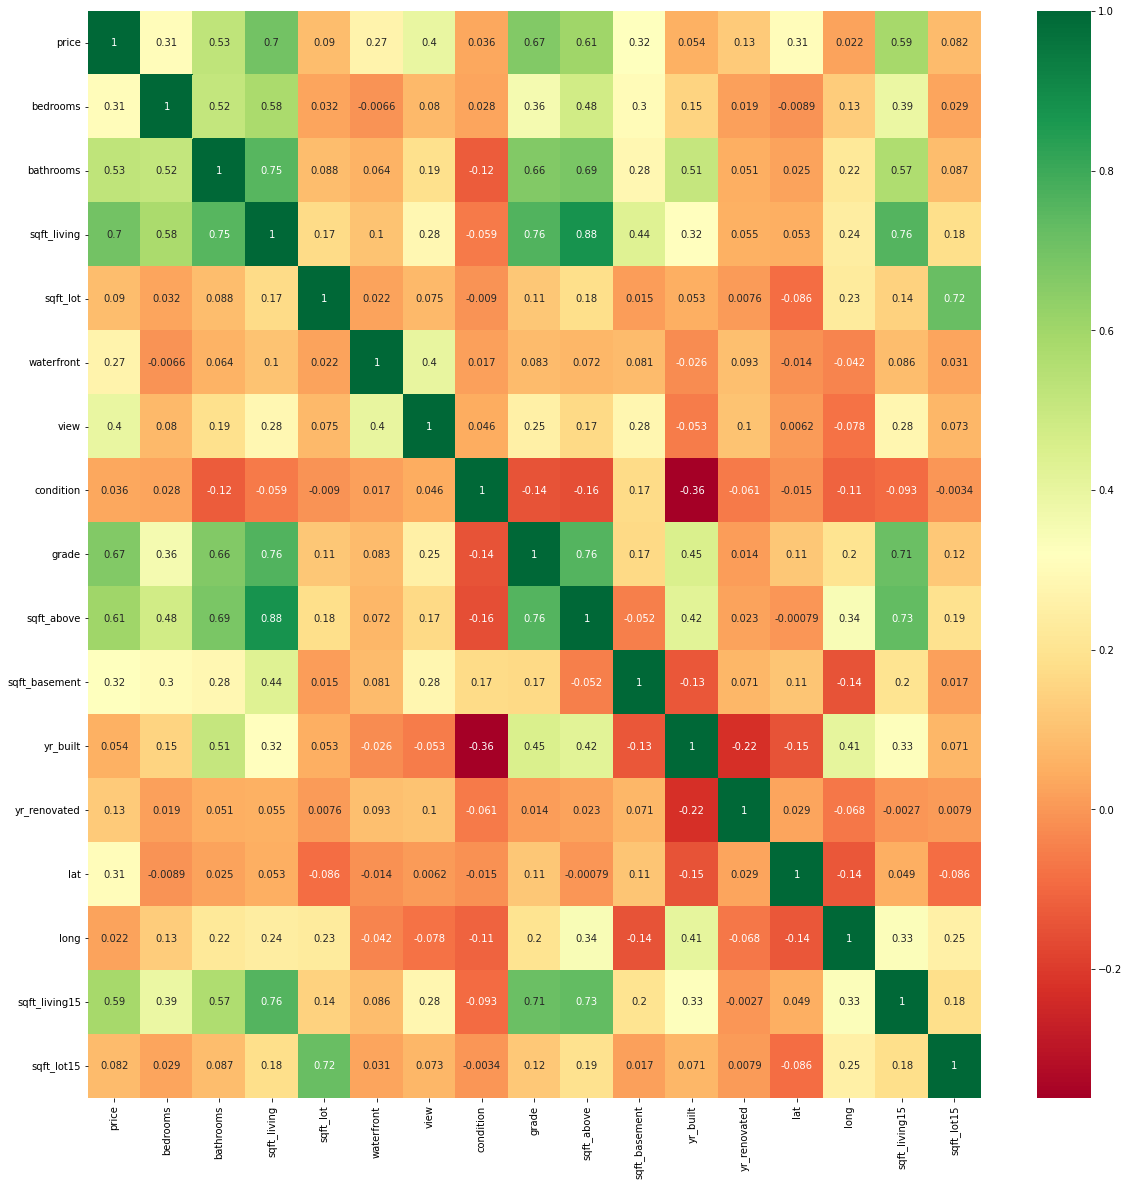

In [ ]:
#get correlations of each features in dataset
corrmat = house.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Feature selection**
Heatmap makes it easy to identify which features are most related to the target variable according to the color.
we look at the correlation of the price column with the other columns, sqft_living is the is the highly correlated with price range followed by grade, sqft_above, sqft_living15 and bathrooms.

#Linear regression

In [ ]:
#extract x and y from our data
x1=house["sqft_living"].values[:,np.newaxis]
y=house["price"].values

x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x1_train,y_train)  #fitting the training data
predicted=model.predict(x1_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 65956014482.54118
R squared 0.49806133058026547


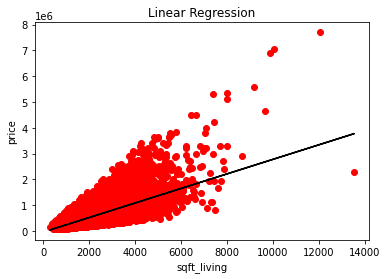

In [ ]:
plt.scatter(x1,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x1,model.predict(x),color="k")
plt.show()



#Multi linear regression
##Train-Test Split dataset

set the target and predictors

In [ ]:
y = house.price  # target
# use only those input features with numeric data type 
house_temp = house.select_dtypes(include=["int64","float64"])  #we have more than one input
x= house_temp.drop(["price"],axis=1)  # predictors

Train-Test

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 40339012355.67896
R squared 0.6930119209541477


Shape of the train and test sets

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14047, 16)
(7565, 16)
(14047,)
(7565,)


**Retrieve the intercept** (b) :the expected mean value of Y when all X=0.

In [ ]:
print(model.intercept_)

-37769518.512064114


**Retrieve the slope** (a) : it tells you how much you can expect Y to change as X increases

In [ ]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-33484.502480
bathrooms,39955.404602
sqft_living,105.821782
sqft_lot,0.140902
waterfront,641629.244182
view,47989.104971
condition,30813.610324
grade,97582.779793
sqft_above,71.497360
sqft_basement,34.324422


Predicted value

In [ ]:
pred = model.predict(x_test)

Text(0, 0.5, 'Predicted Y')

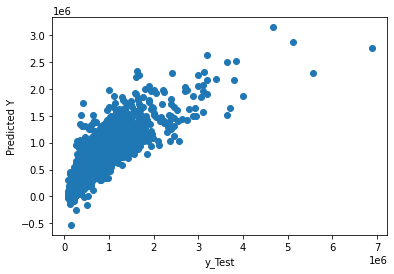

In [ ]:
plt.scatter(x = y_test, y= pred)
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

We will do cross-validation to see whether the model is over-fitting the data:
the cross-validation performance is very close in value so the model is not over-fitting the data 

In [ ]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(model, x, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)


Cross-validation results:  [0.69200222 0.68667528 0.68804498 0.70254154 0.68301376]


# the performance
**Calculatet the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**  to see how well a model is able to fit a dataset. we see that our model is able to fit the data

In [ ]:

print('MAE:', 
      metrics.mean_absolute_error(y_test, pred), ' ',
      (1./len(y_test))*(sum(abs(y_test-pred))))
print('MSE:', 
      metrics.mean_squared_error(y_test, pred), ' ',
      (1./len(y_test))*(sum((y_test-pred)**2)))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(y_test, pred)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-pred)**2))))

MAE: 125768.41198727966   125768.4119872796
MSE: 40339012355.67896   40339012355.67905
RMSE: 200845.7426874639   200845.7426874641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


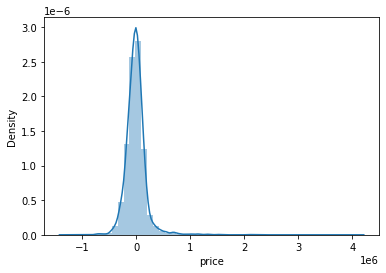

In [ ]:
sns.distplot((y_test - pred), bins=50);

#Polynomial regression

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  26792698579.297234
R squared:  0.7961021207760168


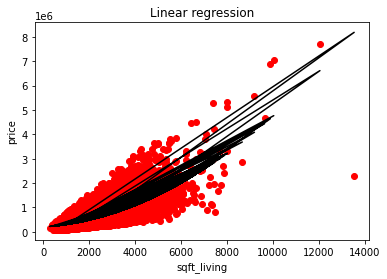

In [ ]:
x= house["sqft-living"].values.reshape(-1,1)
y= house["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 